# 小麦とチェス盤問題

In [40]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [41]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


【問題1】2×2マスのチェス盤の小麦の数

In [42]:
small_board_ndarray = small_board_ndarray.reshape(2,2)
print("4マスの板に小麦を並べる（ndarray）：\n{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：
[[1 2]
 [4 8]]


【問題2】n×mマスへの拡張

In [43]:
def wheat_check(row, col):
    small_board_list = [1]
    for _ in range(row * col - 1):
        small_board_list.append(2*small_board_list[-1])
    small_board_ndarray = np.array(small_board_list).reshape(row, col)
    return small_board_ndarray

wheat = wheat_check(8,8)
print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

8×8マスの板に小麦を並べる（ndarray）：
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.6116

【問題3】小麦の数の合計

チェス盤上の小麦の合計: 1.8446744073709552e+19
チェス盤面の列ごとの平均値:
 [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


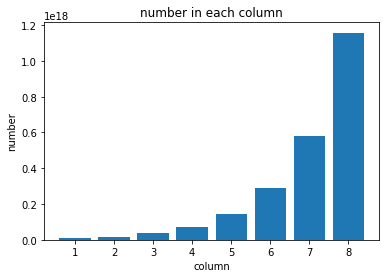

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

wheat_sum = wheat.sum()
print('チェス盤上の小麦の合計:', wheat_sum)
wheat_row_mean = wheat.mean(axis=0)
print('チェス盤面の列ごとの平均値:\n', wheat_row_mean)

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), wheat_row_mean, linewidth=4)
plt.show()

【問題4】小麦の数のヒートマップ

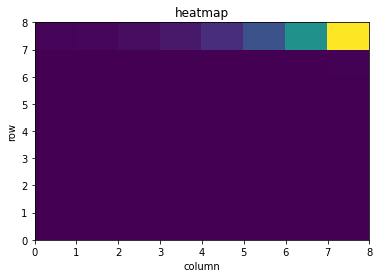

In [45]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(wheat)
plt.show()

【問題5】後半は前半の何倍か

In [49]:
first_half = wheat[0:4, :]
last_half = wheat[4:8, :]
first_sum = first_half.sum()
last_sum = last_half.sum()

print('後半は前半の{}倍'.format(last_sum / first_sum))

後半は前半の4294967296.0倍


【問題6】他の計算方法によるn×mマスへの拡張

In [51]:
# append
def wheat_check(row, col):
    small_board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(row * col - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
    return small_board_ndarray

wheat = wheat_check(8,8)
print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

8×8マスの板に小麦を並べる（ndarray）：
[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18

In [56]:
# ブロードキャスト
def wheat_check(row, col):
    indices_of_squares = np.arange(row * col).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    return small_board_ndarray

wheat = wheat_check(8,8)
print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

8×8マスの板に小麦を並べる（ndarray）：
[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328

【問題7】計算時間の比較

In [64]:
%%timeit
# 問題2
def wheat_check(row, col):
    small_board_list = [1]
    for _ in range(row * col - 1):
        small_board_list.append(2*small_board_list[-1])
    small_board_ndarray = np.array(small_board_list).reshape(row, col)
    return small_board_ndarray

wheat = wheat_check(8,8)
# print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

22.7 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [66]:
%%timeit
# append
def wheat_check(row, col):
    small_board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(row * col - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
    return small_board_ndarray

wheat = wheat_check(8,8)
# print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

640 µs ± 32.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%%timeit
# ブロードキャスト
def wheat_check(row, col):
    indices_of_squares = np.arange(row * col).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    return small_board_ndarray

wheat = wheat_check(8,8)
# print("8×8マスの板に小麦を並べる（ndarray）：\n{}".format(wheat))

4.49 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


時間計測の結論として、ブロードキャストが一番早く処理を行うことができる。
理由として、for文のような段階的な処理ではなく、ブロードキャストによって一括で処理を
行うことができている点。また、appendでも同様、1stepごとに対象へ値を追加するのではなく、
一括で処理を行うことができているからと考える。